In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [4]:
numeric_features = ["Age", "DiabetesPedigreeFunction", "BMI", "Insulin", "SkinThickness", "BloodPressure", "Glucose", "Pregnancies"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1


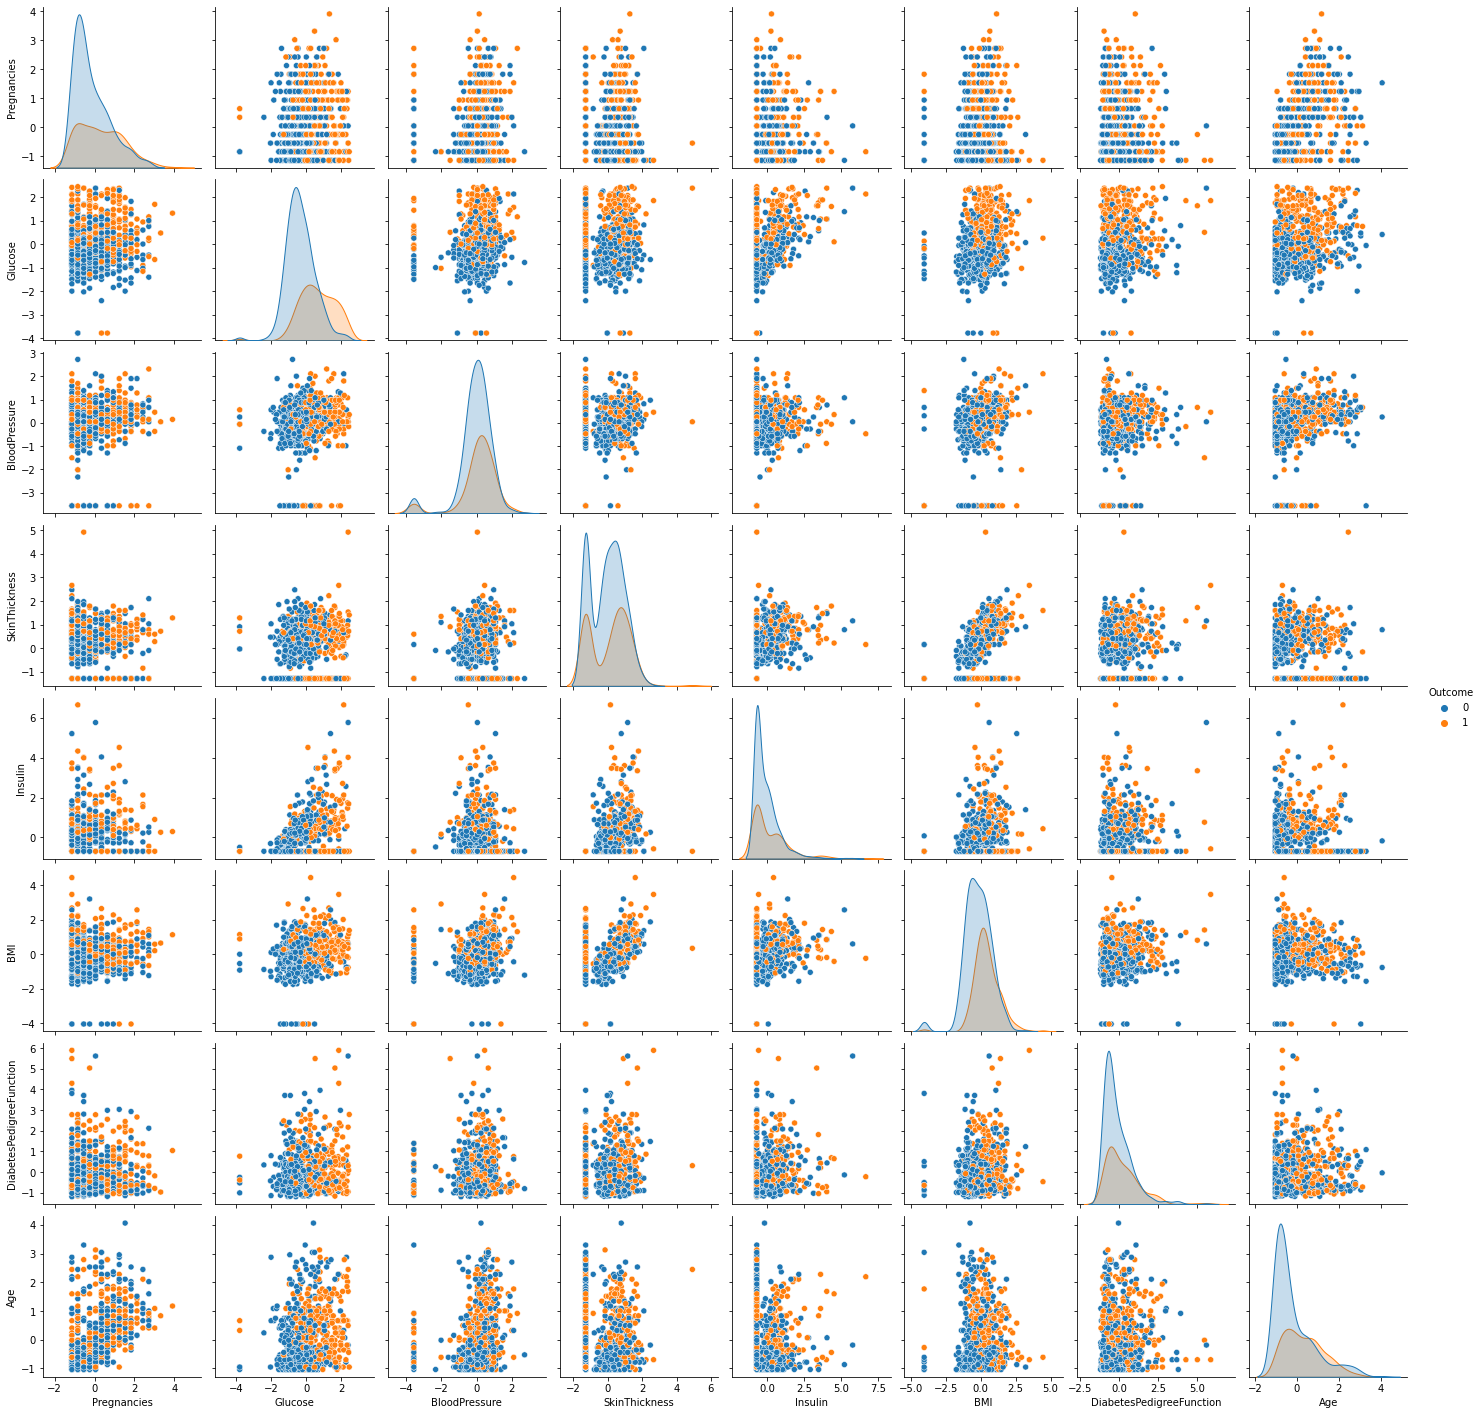

In [5]:
sns.pairplot(df, hue="Outcome")

<AxesSubplot:xlabel='Age', ylabel='count'>

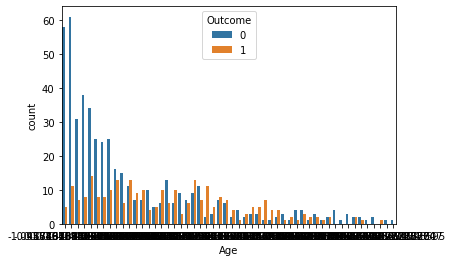

In [6]:
sns.countplot(x="Age", data=df, hue="Outcome")

In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [9]:
clf1 = LogisticRegression(solver='liblinear')
cross_val_score(clf1, X, y, cv=10).mean()

0.7708817498291183

In [10]:
clf2 = RandomForestClassifier()
cross_val_score(clf2, X, y, cv=10).mean()

0.7695317840054682

In [11]:
clf3 = ExtraTreesClassifier()
cross_val_score(clf3, X, y, cv=10).mean()

0.7642686261107314

In [12]:
clf4 = GradientBoostingClassifier()
cross_val_score(clf4, X, y, cv=10).mean()

0.7643028024606973

In [13]:
clf = VotingClassifier(estimators=[("lr", clf1), ("rf", clf2), ("xt", clf3), ("gb", clf4)],
                       voting="soft")
cross_val_score(clf, X, y, cv=10).mean()

0.7669172932330828